In [19]:
import pandas as pd
import numpy as np
from IPython.display import display


df = pd.read_csv('data.csv', parse_dates=['timestamp'])
# df['per_meter_time'] = df.meter_time / df.meter_num
df['ex_meter_time'] = df.control + df.ta + df['agg']

# display(df.style)
df.head()
# print( + df.control)

,func,control,ta,agg,meter_num,meter_time,name,host,timestamp,ex_meter_time
0,oneTimeMeterRegTime,802463,0,1119269908,60,1139794403,boudia,raspberrypi,2021-07-18 01:46:46,1120072371
1,oneTimeMeterRepTime,88431389,0,1181977147,60,4464393556,boudia,raspberrypi,2021-07-18 01:46:46,1270408536
2,oneTimeMeterRegTime,5908,0,905488205,50,904598016,boudia,raspberrypi,2021-07-18 01:46:46,905494113
3,oneTimeMeterRepTime,86747648,0,975136185,50,3646598497,boudia,raspberrypi,2021-07-18 01:46:46,1061883833
4,oneTimeMeterRegTime,4315,0,729340837,40,717047738,boudia,raspberrypi,2021-07-18 01:46:46,729345152


In [20]:
avg_col = {'control':np.mean, 'ta':np.mean, 'agg':np.mean, 'meter_time':np.mean, 'ex_meter_time':np.mean}
avg_df_midx = df.groupby(['host', 'name', 'func', 'meter_num']).agg(avg_col)
display(avg_df_midx.style)
avg_df_midx.rename(index={'cir':'our'})

control   ta  \
host        name   func                meter_num                      
BruceChen   boudia oneTimeMeterRegTime 20         1.252736e+03  0.0   
                                       30         1.200498e+03  0.0   
                                       40         9.517413e+02  0.0   
                                       50         9.567164e+02  0.0   
                                       60         2.063184e+05  0.0   
...                                                        ...  ...   
raspberrypi ni     oneTimeMeterRepTime 20         6.571769e+07  0.0   
                                       30         6.551537e+07  0.0   
                                       40         6.522315e+07  0.0   
                                       50         6.509480e+07  0.0   
                                       60         6.587265e+07  0.0   

                                                           agg    meter_time  \
host        name   func                meter_num                               
BruceChen   boudia oneTimeMeterRegTime 20         1.300773e+08  1.298751e+08   
                                       30         1.952025e+08  1.981690e+08   
                                       40         2.598814e+08  2.597483e+08   
                                       50         3.267297e+08  3.267719e+08   
                                       60         3.937296e+08  3.933693e+08   
...                                                        ...           ...   
raspberrypi ni     oneTimeMeterRepTime 20         3.933207e+09  2.208998e+09   
                                       30         5.879113e+09  3.317065e+09   
                                       40         7.826942e+09  4.427315e+09   
                                       50         9.780693e+09  5.550862e+09   
                                       60         1.177722e+10  6.709754e+09   

                                                  ex_meter_time  
host        name   func                meter_num                 
BruceChen   boudia oneTimeMeterRegTime 20          1.300785e+08  
                                       30          1.952037e+08  
                                       40          2.598823e+08  
                                       50          3.267307e+08  
                                       60          3.939359e+08  
...                                                         ...  
raspberrypi ni     oneTimeMeterRepTime 20          3.998925e+09  
                                       30          5.944628e+09  
                                       40          7.892165e+09  
                                       50          9.845788e+09  
                                       60          1.184309e+10  

[106 rows x 5 columns]

In [21]:
display(avg_df_midx.index)

MultiIndex([(  'BruceChen', 'boudia', 'oneTimeMeterRegTime', 20),
            (  'BruceChen', 'boudia', 'oneTimeMeterRegTime', 30),
            (  'BruceChen', 'boudia', 'oneTimeMeterRegTime', 40),
            (  'BruceChen', 'boudia', 'oneTimeMeterRegTime', 50),
            (  'BruceChen', 'boudia', 'oneTimeMeterRegTime', 60),
            (  'BruceChen', 'boudia', 'oneTimeMeterRepTime', 20),
            (  'BruceChen', 'boudia', 'oneTimeMeterRepTime', 30),
            (  'BruceChen', 'boudia', 'oneTimeMeterRepTime', 40),
            (  'BruceChen', 'boudia', 'oneTimeMeterRepTime', 50),
            (  'BruceChen', 'boudia', 'oneTimeMeterRepTime', 60),
            ...
            ('raspberrypi',     'ni', 'oneTimeMeterRegTime', 20),
            ('raspberrypi',     'ni', 'oneTimeMeterRegTime', 30),
            ('raspberrypi',     'ni', 'oneTimeMeterRegTime', 40),
            ('raspberrypi',     'ni', 'oneTimeMeterRegTime', 50),
            ('raspberrypi',     'ni', 'oneTimeMeterRegTime',

In [22]:
display(avg_df_midx.loc[('raspberrypi', 'boudia', 'oneTimeMeterRegTime')].index)
display(avg_df_midx.loc[('raspberrypi', 'boudia', 'oneTimeMeterRegTime'), 'meter_time'])

Int64Index([20, 30, 40, 50, 60], dtype='int64', name='meter_num')

meter_num
20    3.596670e+08
30    5.401054e+08
40    7.223274e+08
50    9.016852e+08
60    1.111270e+09
Name: meter_time, dtype: float64

# 对比实验


In [23]:
exp_name = avg_df_midx.index.get_level_values(1).drop_duplicates().array
display(exp_name)
# adjust order
exp_name[1], exp_name[3] = exp_name[3], exp_name[1]
display(exp_name)
name_map = {'boudia':'Boudia', 'cir':'Our', 'homo':'Chen', 'ni':'Ni'}
reg_func = [ 'oneTimeMeterRegTime' , 'oneTimeMeterRegTime', 'meterRegTime', 'meterRegTime_3']
rep_func = ['oneTimeMeterRepTime', 'oneTimeMeterRepTime', 'oneTimeMeterRepTime', 'meterRepTime_3']


<PandasArray>
['boudia', 'cir', 'homo', 'ni']
Length: 4, dtype: object

<PandasArray>
['boudia', 'ni', 'homo', 'cir']
Length: 4, dtype: object

In [24]:
import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 10
# plt.rcParams['font.weight'] = 'bold'
# plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['lines.linewidth'] = 0.5
plt.rcParams['lines.markersize'] = 2.5
plt.rcParams["figure.figsize"] = (5, 4)
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["axes.formatter.use_mathtext"] = True
markers = ['o', 'v', 's', 'd', 'X']
color = ['b', 'y', 'g', 'r']

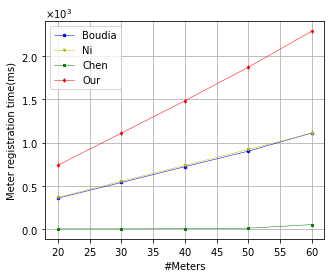

In [25]:
# 注册阶段 电表时间

for i, e, f in zip(range(0,4), exp_name, reg_func):
    x = avg_df_midx.loc[('raspberrypi', e, f)].index
    y = avg_df_midx.loc[('raspberrypi', e, f), 'meter_time']/1e6
    plt.plot(x, y, marker=markers[i], color=color[i], label=name_map[e])

plt.xlabel('#Meters')
plt.ylabel('Meter registration time(ms)')
plt.ticklabel_format(axis='y', style='sci', scilimits=(-4, 3))
plt.grid()
plt.legend()
plt.savefig('figs/meter_reg.svg')
plt.show()

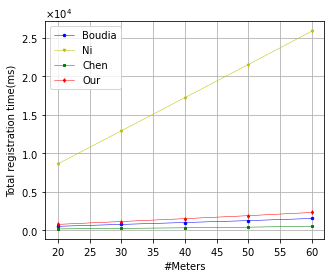

In [26]:
# 注册阶段 总时间
for i, e, f in zip(range(0,4), exp_name, reg_func):
    rap_df = avg_df_midx.loc[('raspberrypi', e, f)]
    host_df = avg_df_midx.loc[('BruceChen', e, f)]
    x = rap_df.index
    y = (host_df.ex_meter_time + rap_df.meter_time)/1e6
    plt.plot(x, y, marker=markers[i], color=color[i], label=name_map[e])

plt.xlabel('#Meters')
plt.ylabel('Total registration time(ms)')
plt.ticklabel_format(axis='y', style='sci', scilimits=(-4, 3))
plt.grid()
plt.legend()
plt.savefig('figs/total_reg.svg')

plt.show()

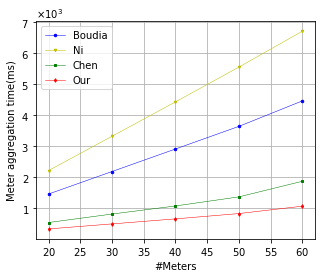

In [27]:
# 聚合阶段 电表
for i, e, f in zip(range(0,4), exp_name, rep_func):
    host_df = avg_df_midx.loc[('raspberrypi', e, f)]
    x = host_df.index
    y = host_df.meter_time/1e6
    plt.plot(x, y, marker=markers[i], color=color[i], label=name_map[e])

plt.xlabel('#Meters')
plt.ylabel('Meter aggregation time(ms)')
plt.ticklabel_format(axis='y', style='sci', scilimits=(-4, 3))
plt.grid()
plt.legend()
plt.savefig('figs/meter_report.svg')

plt.show()
plt.show()

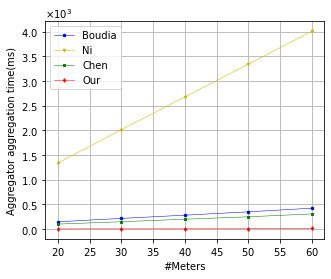

In [28]:
# 聚合阶段 聚合器

for i, e, f in zip(range(0,4), exp_name, rep_func):
    host_df = avg_df_midx.loc[('BruceChen', e, f)]
    x = host_df.index
    y = host_df['agg']/1e6
    plt.plot(x, y, marker=markers[i], color=color[i], label=name_map[e])

plt.xlabel('#Meters')
plt.ylabel('Aggregator aggregation time(ms)')
plt.ticklabel_format(axis='y', style='sci', scilimits=(-4, 3))
plt.grid()
plt.legend()
plt.savefig('figs/agg_report.svg')

plt.show()
plt.show()

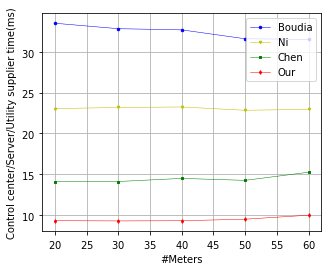

In [29]:
# 聚合阶段 控制中心

for i, e, f in zip(range(0,4), exp_name, rep_func):
    host_df = avg_df_midx.loc[('BruceChen', e, f)]
    x = host_df.index
    y = host_df.control/1e6
    plt.plot(x, y, marker=markers[i], color=color[i], label=name_map[e])

plt.xlabel('#Meters')
plt.ylabel('Control center/Server/Utility supplier time(ms)')
plt.ticklabel_format(axis='y', style='sci', scilimits=(-4, 3))
plt.grid()
plt.legend()
plt.savefig('figs/control_report.svg')

plt.show()
plt.show()

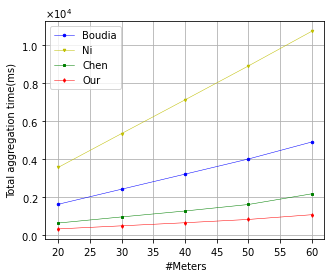

In [30]:
# 聚合阶段 总时间

for i, e, f in zip(range(0,4), exp_name, rep_func):
    rap_df = avg_df_midx.loc[('raspberrypi', e, f)]
    host_df = avg_df_midx.loc[('BruceChen', e, f)]
    x = rap_df.index
    y = (host_df.ex_meter_time + rap_df.meter_time)/1e6
    plt.plot(x, y, marker=markers[i], color=color[i], label=name_map[e])

plt.xlabel('#Meters')
plt.ylabel('Total aggregation time(ms)')
plt.ticklabel_format(axis='y', style='sci', scilimits=(-4, 3))
plt.grid()
plt.legend()
plt.savefig('figs/total_report.svg')
plt.show()


# 本文方法分析

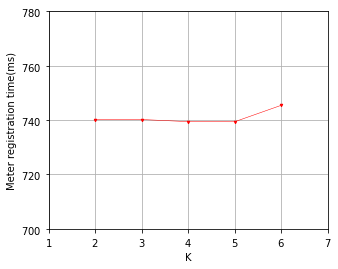

In [37]:
# k anonymous register meter

k = [k for k in range(2,7)]
k_anony_f = ['meterRegTime_' + str(k) for k in range(2, 7)]
m_num = 20
k_y = [avg_df_midx.loc[('raspberrypi', 'cir', f, m_num), 'meter_time']/1e6 for f in k_anony_f]

plt.plot(k, k_y, marker=markers[3], color='r')

plt.xlabel('K')
plt.ylabel('Meter registration time(ms)')
plt.ticklabel_format(axis='y', style='sci', scilimits=(-4, 3))
plt.grid()
plt.yticks(range(700, 790, 20))
plt.xticks(range(1,8))
plt.savefig('figs/meter_k_meter_register.svg')
plt.show()

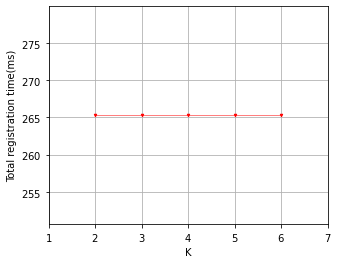

In [38]:
# 注册阶段 总时间
# k anonymous register total

k = [k for k in range(2,7)]
k_anony_f = ['meterRegTime_' + str(k) for k in range(2, 7)]
m_num = 20
k_y = []
for fname in k_anony_f:
     rasp_time = avg_df_midx.loc[('raspberrypi', 'cir', f, m_num), 'meter_time']
     host_time = avg_df_midx.loc[('BruceChen', 'cir', f, m_num), 'ex_meter_time']
     y_time = (rasp_time + host_time) / 1e6
     k_y.append(y_time)

plt.plot(k, k_y, marker=markers[3], color='r')
plt.xlabel('K')
plt.ylabel('Total registration time(ms)')
plt.xticks(range(1, 8))
plt.ticklabel_format(axis='y', style='sci', scilimits=(-4, 3))
plt.grid()
plt.savefig('figs/total_k_total_reg.svg')

plt.show()

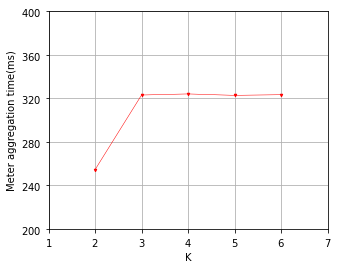

In [39]:
#聚合阶段
# k anonymous report merter

k = [k for k in range(2,7)]
k_anony_f = ['meterRepTime_' + str(k) for k in range(2, 7)]
m_num = 20
k_y = [avg_df_midx.loc[('raspberrypi', 'cir', f, m_num), 'meter_time']/1e6 for f in k_anony_f]

plt.plot(k, k_y, marker=markers[3], color='r')

plt.xlabel('K')
plt.ylabel('Meter aggregation time(ms)')
plt.ticklabel_format(axis='y', style='sci', scilimits=(-4, 3))
plt.grid()
plt.yticks(range(200, 430, 40))
plt.xticks(range(1, 8))
plt.savefig('figs/meter_k_meter_report.svg')
plt.show()

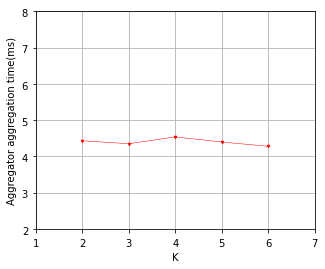

In [40]:
# k anonymous report aggregator
k = [k for k in range(2,7)]
k_anony_f = ['meterRepTime_' + str(k) for k in range(2, 7)]
m_num = 20
k_y = [avg_df_midx.loc[('raspberrypi', 'cir', f, m_num), 'agg']/1e6 for f in k_anony_f]

plt.plot(k, k_y, marker=markers[3], color='r')

plt.xlabel('K')
plt.ylabel('Aggregator aggregation time(ms)')
plt.ticklabel_format(axis='y', style='sci', scilimits=(-4, 3))
plt.grid()
plt.yticks(range(2, 9))
plt.xticks(range(1, 8))
plt.savefig('figs/meter_k_agg_report.svg')
plt.show()

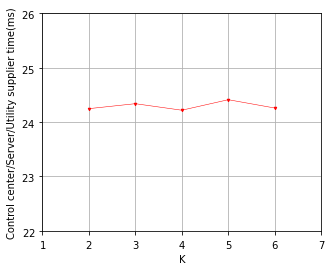

In [41]:
# k anonymous report controll

k = [k for k in range(2,7)]
k_anony_f = ['meterRepTime_' + str(k) for k in range(2, 7)]
m_num = 20
k_y = [avg_df_midx.loc[('raspberrypi', 'cir', f, m_num), 'control']/1e6 for f in k_anony_f]

plt.plot(k, k_y, marker=markers[3], color='r')

plt.xlabel('K')
plt.ylabel('CoVtrol center/Server/Utility supplier time(ms)')
plt.ticklabel_format(axis='y', style='sci', scilimits=(-4, 3))
plt.grid()
plt.yticks(range(22, 27))
plt.xticks(range(1, 8))
plt.savefig('figs/meter_k_control_report.svg')
plt.show()

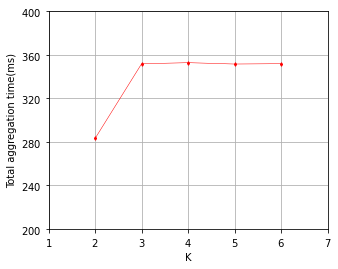

In [51]:

# k anonymous report total

k = [k for k in range(2,7)]
k_anony_f = ['meterRepTime_' + str(k) for k in range(2, 7)]
m_num = 20
k_y = []
for f in k_anony_f:
    rasp_time = avg_df_midx.loc[('raspberrypi', 'cir', f, m_num), 'meter_time']
    host_time = avg_df_midx.loc[('raspberrypi', 'cir', f, m_num), 'ex_meter_time']
    y_time = (rasp_time + host_time) / 1e6
    k_y.append(y_time)

plt.plot(k, k_y, marker=markers[3], color='r')

plt.xlabel('K')
plt.ylabel('Total aggregation time(ms)')
plt.ticklabel_format(axis='y', style='sci', scilimits=(-4, 3))
plt.grid()
plt.yticks(range(200, 430, 40))
plt.xticks(range(1, 8))
plt.savefig('figs/meter_k_total_report.svg')
plt.show()

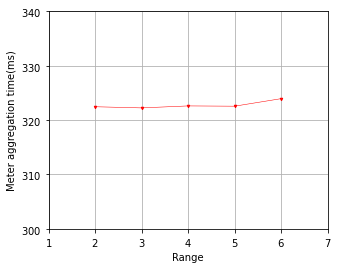

In [ ]:
# k anonymous range meter

r = [r for r in range(2,7)]
r_anony_f = ['meterRepTime_r' + str(k) for k in range(2, 7)]
m_num = 20
r_y = [avg_df_midx.loc[('raspberrypi', 'cir', f, m_num), 'meter_time']/1e6 for f in r_anony_f]

plt.plot(r, r_y, marker=markers[3], color=color[1])

plt.xlabel('Range')
plt.ylabel('Meter aggregation time(ms)')
plt.ticklabel_format(axis='y', style='sci', scilimits=(-4, 3))
plt.grid()
plt.yticks(range(300, 350, 10))
plt.xticks(range(1, 8))

plt.savefig('figs/meter_range_meter_report.svg')
plt.show()

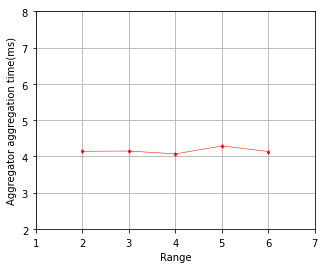

In [65]:
# k anonymous range aggregator

r = [r for r in range(2,7)]
r_anony_f = ['meterRepTime_r' + str(k) for k in range(2, 7)]
m_num = 20
r_y = [avg_df_midx.loc[('raspberrypi', 'cir', f, m_num), 'agg']/1e6 for f in r_anony_f]

plt.plot(r, r_y, marker=markers[3], color='r')

plt.xlabel('Range')
plt.ylabel('Aggregator aggregation time(ms)')
plt.ticklabel_format(axis='y', style='sci', scilimits=(-4, 3))
plt.grid()
plt.yticks(range(2, 9))
plt.xticks(range(1, 8))

plt.savefig('figs/meter_range_agg_report.svg')
plt.show()

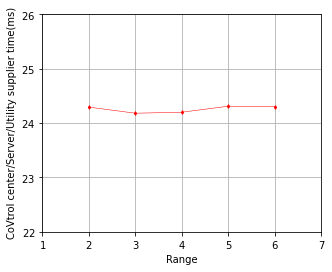

In [59]:
# k anonymous range control

r = [r for r in range(2,7)]
r_anony_f = ['meterRepTime_r' + str(k) for k in range(2, 7)]
m_num = 20
r_y = [avg_df_midx.loc[('raspberrypi', 'cir', f, m_num), 'control']/1e6 for f in r_anony_f]

plt.plot(r, r_y, marker=markers[3], color='r')

plt.xlabel('Range')
plt.ylabel('CoVtrol center/Server/Utility supplier time(ms)')
plt.ticklabel_format(axis='y', style='sci', scilimits=(-4, 3))
plt.grid()
plt.yticks(range(22, 27))
plt.xticks(range(1, 8))

plt.savefig('figs/meter_range_control_report.svg')
plt.show()

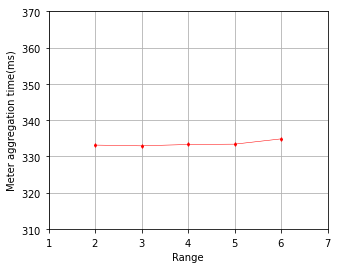

In [64]:
# k anonymous range total

r = [r for r in range(2,7)]
r_anony_f = ['meterRepTime_r' + str(k) for k in range(2, 7)]
m_num = 20
r_y = []
for f in r_anony_f:
    rasp_time = avg_df_midx.loc[('raspberrypi', 'cir', f, m_num), 'meter_time']
    host_time = avg_df_midx.loc[('BruceChen', 'cir', f, m_num), 'ex_meter_time']
    y_time = (rasp_time + host_time) / 1e6
    r_y.append(y_time)

plt.plot(r, r_y, marker=markers[3], color='r')

plt.xlabel('Range')
plt.ylabel('Meter aggregation time(ms)')
plt.ticklabel_format(axis='y', style='sci', scilimits=(-4, 3))
plt.grid()
plt.yticks(range(310, 380, 10))
plt.xticks(range(1, 8))

plt.savefig('figs/meter_range_total_report.svg')
plt.show()